In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e3/sample_submission.csv
/kaggle/input/playground-series-s4e3/train.csv
/kaggle/input/playground-series-s4e3/test.csv


In [2]:
#imports
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

#models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


from sklearn.metrics import accuracy_score, roc_auc_score

/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [3]:
train= pd.read_csv('/kaggle/input/playground-series-s4e3/train.csv')
test= pd.read_csv('/kaggle/input/playground-series-s4e3/test.csv')

train.shape, test.shape

((19219, 35), (12814, 28))

In [4]:
train.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [5]:
test.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,19219,1015,1033,3826564,3826588,659,23,46,62357,67,...,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172
1,19220,1257,1271,419960,419973,370,26,28,39293,92,...,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104
2,19221,1358,1372,117715,117724,289,36,32,29386,101,...,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514
3,19222,158,168,232415,232440,80,10,11,8586,107,...,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051
4,19223,559,592,544375,544389,140,19,15,15524,103,...,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170


In [6]:
train.columns, test.columns

(Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
        'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
        'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
        'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
        'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
        'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
        'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
        'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
        'Dirtiness', 'Bumps', 'Other_Faults'],
       dtype='object'),
 Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
        'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
        'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
        'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
        'Edges_Index', 'Empty_Index', 

In [7]:
train.drop(columns=['id'], inplace=True)
test.drop(columns=['id'], inplace=True)

In [8]:
def sum_table(df):
    table = pd.DataFrame(df.dtypes, columns=['data type'])
    table['#missing'] = df.isnull().sum().values
    table['Duplicate'] = df.duplicated().sum()
    table['#'] = df.shape[0]
    table['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    table['min'] = desc['min'].values
    table['max'] = desc['max'].values
    table['mean'] = desc['mean'].values
    table['median'] = desc['50%']
    table['std dev'] = desc['std'].values
    return table

In [9]:
sum_table(train)

,data type,#missing,Duplicate,#,#unique,min,max,mean,median,std dev
X_Minimum,int64,0,0,19219,1191,0.0000,1.705000e+03,7.098547e+02,7.770000e+02,5.315442e+02
X_Maximum,int64,0,0,19219,1259,4.0000,1.713000e+03,7.538576e+02,7.960000e+02,4.998366e+02
Y_Minimum,int64,0,0,19219,3345,6712.0000,1.298766e+07,1.849756e+06,1.398169e+06,1.903554e+06
Y_Maximum,int64,0,0,19219,3341,6724.0000,1.298769e+07,1.846605e+06,1.398179e+06,1.896295e+06
Pixels_Areas,int64,0,0,19219,1154,6.0000,1.526550e+05,1.683988e+03,1.680000e+02,3.730320e+03
X_Perimeter,int64,0,0,19219,460,2.0000,7.553000e+03,9.565466e+01,2.500000e+01,1.778214e+02
Y_Perimeter,int64,0,0,19219,331,1.0000,9.030000e+02,6.412410e+01,2.300000e+01,1.010542e+02
Sum_of_Luminosity,int64,0,0,19219,2595,250.0000,1.159141e+07,1.918467e+05,1.823800e+04,4.420247e+05
Minimum_of_Luminosity,int64,0,0,19219,162,0.0000,1.960000e+02,8.480842e+01,9.000000e+01,2.880034e+01
Maximum_of_Luminosity,int64,0,0,19219,98,39.0000,2.530000e+02,1.286474e+02,1.270000e+02,1.419698e+01


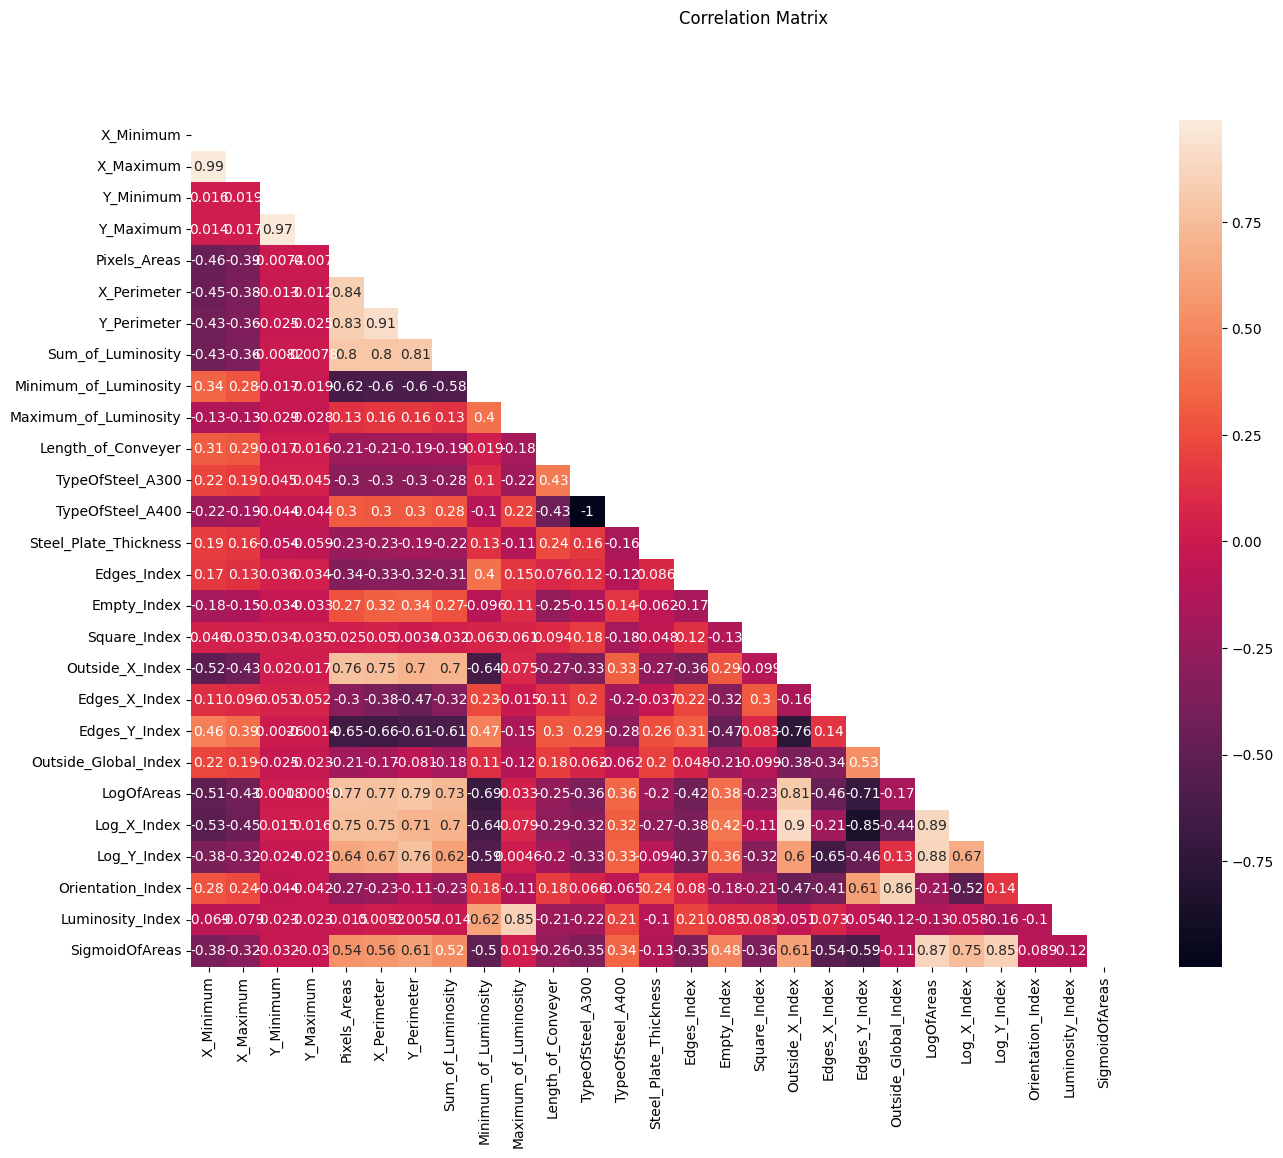

In [10]:
columns_todrop = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
numeric_columns_train = train.select_dtypes(include=np.number).drop(columns=columns_todrop, axis=1)

corr_matrix=numeric_columns_train.corr()

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

f,ax=plt.subplots(figsize=(15,11))
sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.suptitle('Correlation Matrix')
plt.show()

In [11]:
targets = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
X = train.drop(targets, axis=1)
y = np.argmax(train[targets], axis=1)

In [12]:
y

array([3, 6, 2, ..., 0, 6, 5])

In [13]:
scaler = RobustScaler()
scaled_X = scaler.fit_transform(X)
scaled_test = scaler.transform(test)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

In [15]:
# classifiers = {
#     "Logistic Regression": LogisticRegression(),
#     "Support Vector Machine": SVC(probability=True),
#     "Random Forest": RandomForestClassifier(),
#     "XGBoost": XGBClassifier(),
#     "LightGBM": LGBMClassifier(verbose=-1),
#     "CatBoost": CatBoostClassifier(logging_level='Silent'),
#     "Multilayer Perceptron": MLPClassifier()
# }

# results = {}
# for name, clf in classifiers.items():
#     clf.fit(X_train, y_train)
#     train_proba = clf.predict_proba(X_train)
#     test_proba = clf.predict_proba(X_test)
    
#     train_auc = roc_auc_score(y_train, train_proba, average='weighted', multi_class='ovr')
#     test_auc = roc_auc_score(y_test, test_proba, average='weighted', multi_class='ovr')
    
#     results[name] = {'Train AUC': train_auc, 'Test AUC': test_auc}

# results_df = pd.DataFrame([(name, scores['Train AUC'], scores['Test AUC']) for name, scores in results.items()], columns=['Classifier', 'Train AUC', 'Test AUC'])

In [16]:
# plt.figure(figsize=(2.5, 4))
# sns.heatmap(results_df.set_index('Classifier'), cmap='RdYlGn', cbar=False, annot=True, fmt=".3f", linewidths=.5)
# plt.title('Train vs Test AUC Heatmap')
# plt.xlabel('')
# plt.ylabel('')
# plt.show()

In [17]:
# Train final model with best hyperparameters
best_clf = LGBMClassifier(metric='multi_logloss',
                              boosting_type= "gbdt",
                              learning_rate=0.005,
                              n_estimators=800,
                              max_depth=6, num_leaves=252,
                              reg_alpha= 0.002,
                              reg_lambda= 3.5,
                              min_split_gain=0.05,
                              subsample=0.6, verbose=-1)
best_clf.fit(X_train, y_train)

# Final AUC scores
x_pred = best_clf.predict_proba(X_train)
y_pred = best_clf.predict_proba(X_test)

auc_train = roc_auc_score(y_train, x_pred, multi_class="ovr")
auc_test = roc_auc_score(y_test, y_pred, multi_class="ovr")

print(f"Train AUC: {auc_train:.4f}, Test AUC: {auc_test:.4f}")

Train AUC: 0.9333, Test AUC: 0.8703


In [18]:
# Evaluate  on the test set
pred_proba = best_clf.predict_proba(scaled_test)

In [19]:
pred_proba

array([[3.64600736e-01, 2.37988629e-03, 6.63531030e-03, ...,
        2.22337283e-02, 1.43703826e-01, 4.59262517e-01],
       [2.98709871e-01, 1.08918474e-02, 1.86972561e-02, ...,
        1.53391378e-01, 1.73873071e-01, 3.43045312e-01],
       [6.10723022e-02, 4.59461689e-02, 5.21705911e-02, ...,
        1.01632127e-02, 3.11693939e-01, 5.17160209e-01],
       ...,
       [1.40690808e-02, 1.29054551e-03, 9.12531203e-01, ...,
        8.23818379e-04, 3.41294814e-03, 6.73238397e-02],
       [4.57005400e-01, 2.46776542e-02, 3.11389402e-02, ...,
        3.86188979e-02, 1.62085565e-01, 2.85201854e-01],
       [1.91733442e-02, 3.94144052e-03, 9.27798208e-01, ...,
        1.41010526e-03, 3.17217026e-03, 4.40104190e-02]])

In [20]:
submission=pd.read_csv('/kaggle/input/playground-series-s4e3/sample_submission.csv')
submission[targets] = pred_proba
submission

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.364601,0.002380,0.006635,0.001184,0.022234,0.143704,0.459263
1,19220,0.298710,0.010892,0.018697,0.001391,0.153391,0.173873,0.343045
2,19221,0.061072,0.045946,0.052171,0.001794,0.010163,0.311694,0.517160
3,19222,0.199151,0.002592,0.005183,0.002668,0.011811,0.325061,0.453533
4,19223,0.038691,0.002490,0.004947,0.001880,0.008132,0.611451,0.332408
...,...,...,...,...,...,...,...,...
12809,32028,0.170848,0.078885,0.009777,0.001452,0.038038,0.292437,0.408564
12810,32029,0.158455,0.006732,0.030748,0.009847,0.176626,0.154498,0.463094
12811,32030,0.014069,0.001291,0.912531,0.000549,0.000824,0.003413,0.067324
12812,32031,0.457005,0.024678,0.031139,0.001272,0.038619,0.162086,0.285202


In [21]:
submission.to_csv("submission.csv", index=False)
submission.head()

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.364601,0.002380,0.006635,0.001184,0.022234,0.143704,0.459263
1,19220,0.298710,0.010892,0.018697,0.001391,0.153391,0.173873,0.343045
2,19221,0.061072,0.045946,0.052171,0.001794,0.010163,0.311694,0.517160
3,19222,0.199151,0.002592,0.005183,0.002668,0.011811,0.325061,0.453533
4,19223,0.038691,0.002490,0.004947,0.001880,0.008132,0.611451,0.332408
